# Exploratory Data Analysis: Automobile Dataset

This notebook analyzes a dataset of automobile specifications. The goal is to understand the relationship between engine size, fuel consumption, and price, using techniques such as normalization, binning, and ANOVA. Visualizations and statistical summaries are provided to extract insights.

**Dataset**: `imports-85.data`  
**Tools**: Python (Pandas, Seaborn, Matplotlib, SciPy)  
**Author**: Maria Victoria Pérez Contrera  


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

## LOADING THE DATA

In [2]:
data=pd.read_csv('imports-85.data')

In [3]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## ASSING COLUMNS HEADERS

In [4]:
headers = ["symboling", "normalized-losses", "make", 
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size", 
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

In [5]:
data.columns=headers

In [6]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Check for Missing Values

In [7]:
data.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

## Convert miles per gallon(MPG) to liters per 100 kilometers(L/100km)

In [8]:
data['city-mpg']=282.48/data['city-mpg']
data['highway-mpg']=282.48/data['highway-mpg']

In [9]:
data.rename(columns={'city-mpg':'city-L/100km','highway-mpg':'highway-L/100km'},inplace=True)

In [10]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price'],
      dtype='object')

## Convert Price Column to Integer

In [11]:
data['price'].unique()

array(['16500', '13950', '17450', '15250', '17710', '18920', '23875', '?',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',


In [12]:
data=data[data['price']!='?']

In [13]:
data['price']=data['price'].astype(int)

In [14]:
data['price'].dtypes

dtype('int64')

## Normalize Features

In [15]:
data.loc[:,'length'].max()

208.1

Normalizar permite comparar variables que originalmente están en escalas diferentes (por ejemplo, largo en cm vs. peso en kg), útil en modelos de Machine Learning o visualización.

In [16]:
data.loc[:,'length']=data.loc[:,'length']/data.loc[:,'length'].max()
data.loc[:,'width']=data.loc[:,'width']/data.loc[:,'width'].max()
data.loc[:,'height']=data.loc[:,'height']/data.loc[:,'height'].max()

binning- grouping values

In [17]:
bins=np.linspace(min(data['price']),max(data['price']),4)

In [18]:
group_names=['Low','Medium','High']

In [19]:
data['price_binned']=pd.cut(data['price'],bins,labels=group_names,include_lowest=True)

In [20]:
data['price_binned'].head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: price_binned, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

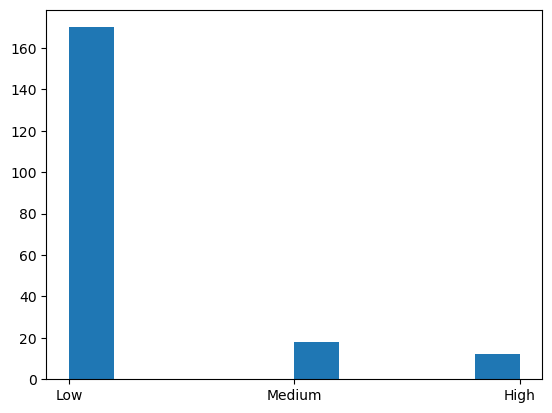

In [21]:
plt.hist(data['price_binned']);

## Convert Categorical Data to Numerical

In [22]:
pd.get_dummies(data['fuel-type']).head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [23]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L/100km,highway-L/100km,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,11.945795,9.666421,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,3.052485,2.217485,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,5.764898,5.231111,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,9.416000,8.308235,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,11.770000,9.416000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,14.867368,11.299200,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,21.729231,17.655000,45400.000000


## Data Visualization

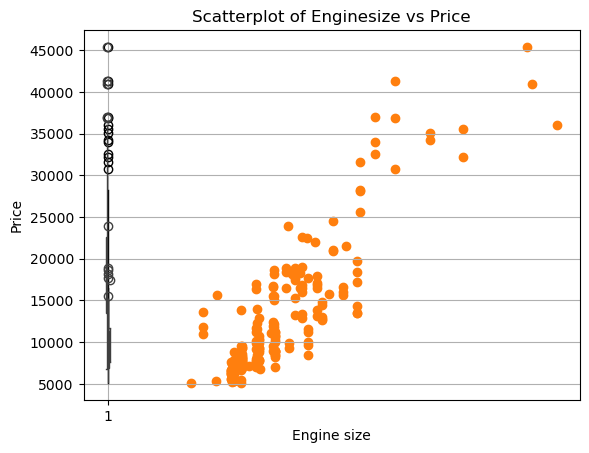

In [24]:
plt.boxplot(data['price'])

sns.boxplot(x ='drive-wheels', y ='price', data = data)

plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()

## Grouping Data by Drive-Wheels and Body-Style

In [25]:
test=data[['drive-wheels','body-style','price']]

In [26]:
data_grp=test.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [27]:
data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


## Create a Pivot Table & Heatmap

In [28]:
data_pivot=data_grp.pivot(index='drive-wheels',columns='body-style',values='price')

In [29]:
data_pivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.00,8249.000000,8396.387755,9811.800000,9997.333333
rwd,26563.25,24202.714286,14337.777778,21711.833333,16994.222222


In [30]:
data_pivot.fillna(0,inplace=True)

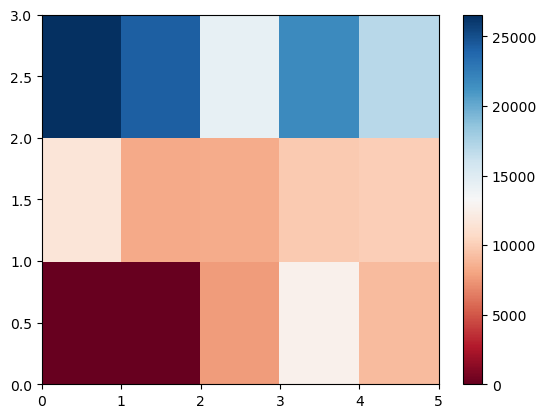

In [31]:
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar();

## Perform ANOVA Test

In [32]:
data_anova=data[['make','price']]

In [33]:
data_anova['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [34]:
group_anova=data_anova.groupby(['make'])

In [35]:
anova_result=sp.stats.f_oneway(
    group_anova.get_group(('chevrolet',))['price'],
    group_anova.get_group(('audi',))['price'],
    group_anova.get_group(('bmw',))['price'])

In [36]:
anova_result

F_onewayResult(statistic=np.float64(9.655506276585614), pvalue=np.float64(0.0023162285524370736))

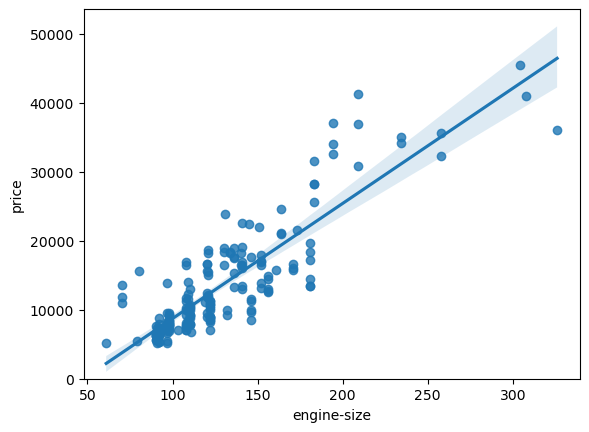

In [37]:
sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0,);

## Conclusions

- Engine size shows a strong correlation with price.
- Fuel type and drive wheels also influence price distributions.
- ANOVA reveals significant price differences between some manufacturers.

Further work may include building predictive models using linear regression or decision trees.
